In [253]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [254]:
import pandas

In [ ]:
a = np.array([[10,1,2,3],[10,4,5,6],[10,7,8,9]])
b = np.array([[1,2,3,28,6],[1,3,4,96,7],[1,4,5,106,8]])
c = np.array([1,2,3,4])
d = [2,3,4,5,6]
y = np.array([1,2,3])

In [55]:
def feature_normalization(train, test):

    # TODO
    mask = [len(set(i)) > 1 for i in train.T]
    train = train.T[mask].T
    test = test.T[mask].T
            
    max_train = np.max(train, axis = 0)
    min_train = np.min(train, axis = 0)
    
    dif_train = max_train - min_train
    
    norm_train = (train - min_train) / dif_train
    norm_test = (test - min_train) / dif_train
    
    return norm_train, norm_test

In [56]:
feature_normalization(a,b)

(array([[0.77114428, 0.        , 0.        , 1.        ],
        [1.        , 0.5       , 0.5       , 0.        ],
        [0.        , 1.        , 1.        , 0.10204082]]),
 array([[ 0.78109453,  0.        , 12.        ,  0.12244898],
        [ 0.78358209,  0.5       , 46.        ,  0.14285714],
        [ 0.78606965,  1.        , 51.        ,  0.16326531]]))

array([[   1,   -2,    3,    4,   49],
       [   1,   90,    4,    5,    0],
       [   1, -312,    5,    6,    5]])

In [156]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    loss = 0 #Initialize the average square loss
    #TODO
    m = len(X)
    loss = sum((np.matmul(X,theta) - y)**2)/m
    return loss
    

In [160]:
compute_square_loss_gradient(X_train,y_train,np.zeros(X_train.shape[1]))

array([ 0.25182065, -0.15015092, -0.40509526, -0.48635482, -0.09047498,
       -0.14102752, -0.19706508, -0.19706508, -0.43171119, -0.64257159,
       -0.69600073, -0.37699938, -0.00881756,  0.1961221 , -0.61472345,
       -0.71499271, -0.57656883, -0.11765843, -0.16572975, -0.16572975,
       -0.16572975, -0.2405182 , -0.2405182 , -0.2405182 , -0.25532376,
       -0.25532376, -0.25532376, -0.26195435, -0.26195435, -0.26195435,
       -0.2655612 , -0.2655612 , -0.2655612 , -0.29115783, -0.29115783,
       -0.29115783, -0.32684613, -0.32684613, -0.32684613, -0.30492033,
       -0.30492033, -0.30492033, -0.29459583, -0.29459583, -0.29459583,
       -0.28881282, -0.28881282, -0.28881282,  0.36972349])

In [82]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = len(X)
    grad = np.matmul(X.T,(np.matmul(X,theta) - y))*(2/m)
    return grad

In [119]:
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    iden = np.array([[1 if i == a else 0 for i in range(num_features)] 
                     for a in range(num_features)])
    
    for i in range(num_features):
        theta_add = theta + iden[i]*epsilon
        theta_minus = theta - iden[i]*epsilon
        approx_grad[i] = (compute_square_loss(X, y, theta_add) - 
                          compute_square_loss(X, y, theta_minus))/(2*epsilon)
    
    
    error = sum((true_gradient - approx_grad)**2)
    if error > tolerance:
        return False
    return True

In [121]:
compute_square_loss_gradient(a, y, c)

array([-480., -124., -172., -220.])

In [120]:
grad_checker(a, y, c, epsilon=0.01, tolerance=1e-4)

[-480. -124. -172. -220.]


True

In [123]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
    # TODO

if __name__ == "__main__":
    main()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


In [143]:
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta)
    for i in range(1,num_step+1):
        theta = theta - alpha*compute_square_loss_gradient(X, y, theta)
        theta_hist[i] = theta
        loss = compute_square_loss(X, y, theta)
        loss_hist[i] = loss
    
    return theta_hist, loss_hist
        

In [169]:
try_theta,try_loss = batch_grad_descent(X_train, y_train, alpha=0.05, num_step=1000, grad_check=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()


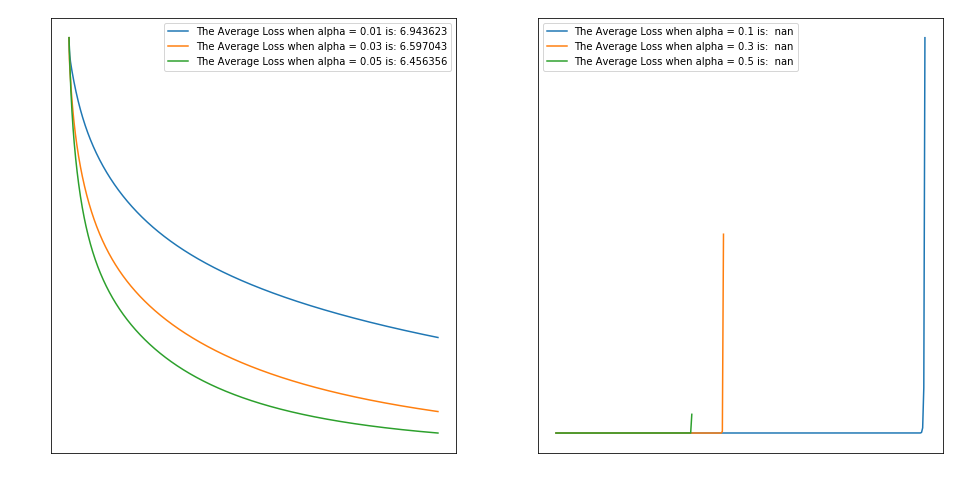

In [372]:
plt.figure(figsize = (16,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
for i in [0.01,0.03,0.05]:
    try_theta,try_loss = batch_grad_descent(X_train, y_train, alpha=i, 
                                            num_step=1000, grad_check=False)
    ax1.plot(range(1001),try_loss, label = 
             'The Average Loss when alpha = %s is: %4f' % (str(i), np.mean(try_loss)))
for i in [0.1,0.3,0.5]:
    try_theta,try_loss = batch_grad_descent(X_train, y_train, alpha=i, 
                                            num_step=1000, grad_check=False)
    ax2.plot(range(1001),try_loss, label = 
             'The Average Loss when alpha = %s is: %4f' % (str(i), np.mean(try_loss)))
ax1.legend()
ax1.set_xlabel('Steps')
ax1.set_ylabel('Square Loss')
ax2.legend()
ax2.set_xlabel('Steps')
ax2.set_ylabel('Square Loss')
ax1.xaxis.label.set_color('w')
ax1.tick_params(axis='x', colors='w')
ax1.yaxis.label.set_color('w')
ax1.tick_params(axis='y', colors='w')
ax2.xaxis.label.set_color('w')
ax2.tick_params(axis='x', colors='w')
ax2.yaxis.label.set_color('w')
ax2.tick_params(axis='y', colors='w')

In [389]:
def batch_grad_descent_back(X, y, alpha=0.1, num_step=1000, grad_check=False, beta = 0.8):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta)
    for i in range(1,num_step+1):
        old_loss = compute_square_loss(X, y, theta)
        norm2 = sum(theta**2)
        theta = theta - alpha*compute_square_loss_gradient(X, y, theta)
        theta_hist[i] = theta
        new_loss = compute_square_loss(X, y, theta)
        if new_loss > old_loss - alpha/2*norm2:
            alpha = alpha * beta
        loss_hist[i] = new_loss
    
    return theta_hist, loss_hist

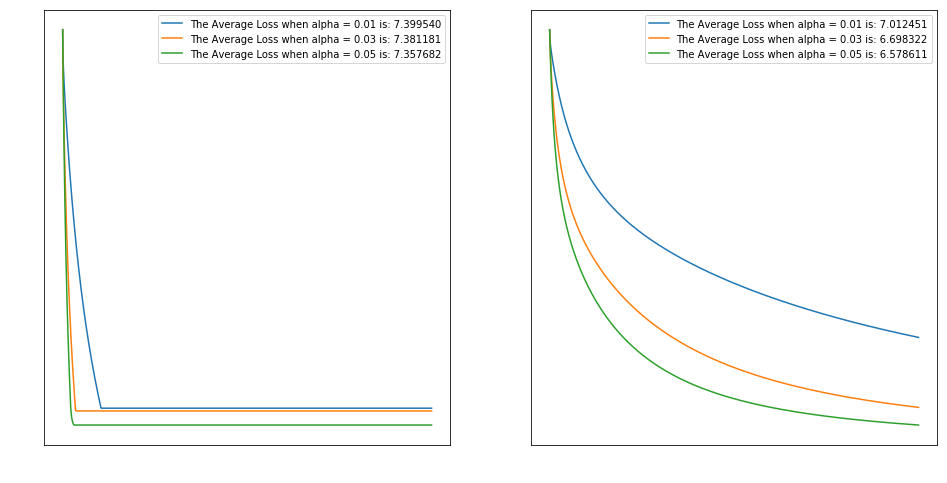

In [399]:
plt.figure(figsize = (16,8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
for i in [0.01,0.03,0.05]:
    try_theta,try_loss = batch_grad_descent(X_train, y_train, alpha=i, 
                                            num_step=1000, grad_check=False)
    ax2.plot(range(1001),try_loss, label = 
             'The Average Loss when alpha = %s is: %4f' % (str(i), np.mean(try_loss)))
    
for i in [0.01,0.03,0.05]:
    try_theta,try_loss = batch_grad_descent_back(X_train, y_train, alpha=i, 
                                            num_step=1000, grad_check=False, beta = 0.1)
    ax1.plot(range(1001),try_loss, label = 
             'The Average Loss when alpha = %s is: %4f' % (str(i), np.mean(try_loss)))

ax1.legend()
ax1.set_xlabel('Steps')
ax1.set_ylabel('Square Loss')
ax1.xaxis.label.set_color('w')
ax1.tick_params(axis='x', colors='w')
ax1.yaxis.label.set_color('w')
ax1.tick_params(axis='y', colors='w')
ax2.legend()
ax2.set_xlabel('Steps')
ax2.set_ylabel('Square Loss')
ax2.xaxis.label.set_color('w')
ax2.tick_params(axis='x', colors='w')
ax2.yaxis.label.set_color('w')
ax2.tick_params(axis='y', colors='w')

In [396]:
%timeit try_theta,try_loss = batch_grad_descent(X_train, y_train, alpha=0.05, num_step=1000, grad_check=False)

41.6 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [398]:
%timeit try_theta,try_loss = batch_grad_descent_back(X_train, y_train, alpha=0.05, num_step=1000, grad_check=False, beta = 0.8)

82.3 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [191]:
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    m = len(X)
    grad = np.matmul(X.T,(np.matmul(X,theta) - y))*(2/m) + 2*lambda_reg*theta
    return grad

In [197]:
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta)
    for i in range(1,num_step+1):
        theta = theta - alpha*compute_regularized_square_loss_gradient(X, y, theta,lambda_reg)
        theta_hist[i] = theta
        loss = compute_square_loss(X, y, theta)
        loss_hist[i] = loss
    
    return theta_hist, loss_hist

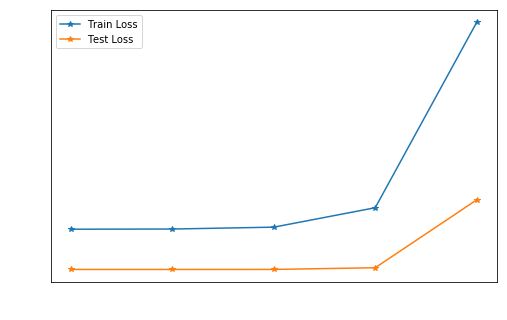

In [382]:
plt.figure(figsize = (8,5))
lambdas = np.array([-5,-4,-3,-2,-1])
train_avg_loss = []
test_avg_loss = []
for i in list(map(lambda x: 1 * 10**x, [-5,-4,-3,-2,-1])):
    train_theta,train_loss = regularized_grad_descent(X_train, y_train, alpha=0.01, lambda_reg = i,
                                            num_step=1000)
    Theta = train_theta[-1]
    train_avg_loss.append(compute_square_loss(X_train,y_train,Theta))
    test_avg_loss.append(compute_square_loss(X_test,y_test,Theta))

ax = plt.subplot(111)
ax.plot(lambdas, train_avg_loss, '-*', label = 'Train Loss')
ax.plot(lambdas, test_avg_loss, '-*', label = 'Test Loss')
ax.legend()
ax.set_xlabel('Log Lambda')
ax.set_ylabel('Square Loss')
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')

In [339]:
train_theta,train_loss = regularized_grad_descent(X_train, y_train, alpha=0.01, lambda_reg = 1e-04,
                                            num_step=1000)
train_theta[-1]

array([-1.02392226,  0.81702456, -0.55171781,  0.41393401,  0.09807699,
        1.0484883 ,  0.16365806,  0.16365806, -0.41292336, -0.94336699,
       -0.40100639,  0.54819332, -1.69917147,  0.1096547 , -0.14505587,
        1.03867047,  0.50225021,  0.15852986, -0.00918544, -0.00918544,
       -0.00918544,  0.04113527,  0.04113527,  0.04113527,  0.05832947,
        0.05832947,  0.05832947,  0.06652043,  0.06652043,  0.06652043,
        0.07113509,  0.07113509,  0.07113509,  0.05018227,  0.05018227,
        0.05018227,  0.12662103,  0.12662103,  0.12662103,  0.10872041,
        0.10872041,  0.10872041,  0.10012987,  0.10012987,  0.10012987,
        0.09526464,  0.09526464,  0.09526464, -0.77860693])

In [522]:
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-4, num_epoch=1000, C = 1):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO

    for i in range(num_epoch):
        if alpha == "1/t":
            new_alpha = C/(i + 1)     
        elif alpha == "1/sqrt(t)":
            new_alpha = C/np.sqrt(i + 1)
        else:
            new_alpha = alpha
        for j in range(num_instances):
            index_r = np.random.randint(0,num_instances)
            theta = theta - new_alpha*2*(X[index_r]*(np.dot(X[index_r].T,theta) - y[index_r])+ lambda_reg*theta)
            loss = compute_square_loss(X, y, theta) + lambda_reg*sum(theta**2)
            theta_hist[i][j] = theta
            loss_hist[i][j] = loss
            
    return theta_hist, loss_hist

Text(0.5, 1.0, '1/t and 1/sqrt(t)')

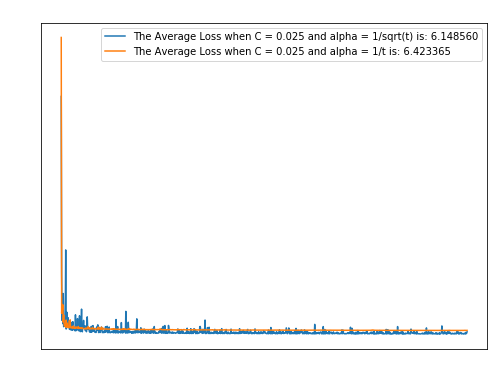

In [519]:
plt.figure(figsize = (8,6))
ax = plt.subplot(111)
for i in ['1/sqrt(t)','1/t']:
    train_theta,train_loss = stochastic_grad_descent(X_train, y_train, alpha=i, 
                                                 lambda_reg=10**-4, num_epoch=1000, C = 0.025)
    Theta = train_theta[-1]
    ax.plot(range(1000),train_loss.T[-1], label = 
             'The Average Loss when C = 0.025 and alpha = %s is: %4f' % (str(i), np.mean(train_loss)))
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Square Loss')
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
ax.set_title('1/t and 1/sqrt(t)',color='w')

Text(0.5, 1.0, 'Tuning C')

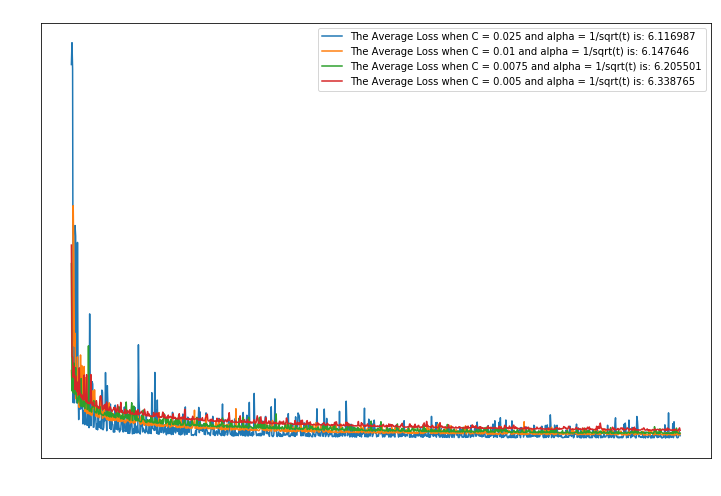

In [543]:
plt.figure(figsize = (12,8))
ax = plt.subplot(111)
for i in [0.025,0.01,0.0075,0.005]:
    train_theta,train_loss = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', 
                                                 lambda_reg=10**-4, num_epoch=1000, C = i)
    Theta = train_theta[-1]
    ax.plot(range(1000),train_loss.T[-1], label = 
             'The Average Loss when C = %s and alpha = 1/sqrt(t) is: %4f' % (str(i), np.mean(train_loss)))
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Square Loss')
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
ax.set_title('Tuning C',color='w')

In [542]:
# plt.figure(figsize = (12,8))
# ax = plt.subplot(111)
for i in [0.1,0.07,0.05,]:
    train_theta,train_loss = stochastic_grad_descent(X_train, y_train, alpha='1/sqrt(t)', 
                                                 lambda_reg=10**-4, num_epoch=1000, C = i)
#     Theta = train_theta[-1]
#     ax.plot(range(1000),train_loss.T[-1], label = 
    print('The Average Loss when C = {} and alpha = 1/sqrt(t) is: {:.2e}'.format(str(i), np.mean(train_loss)))
# ax.legend()
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Square Loss')
# ax.xaxis.label.set_color('w')
# ax.tick_params(axis='x', colors='w')
# ax.yaxis.label.set_color('w')
# ax.tick_params(axis='y', colors='w')
# ax.set_title('Tuning C',color='w')

The Average Loss when C = 0.1 and alpha = 1/sqrt(t) is: 5.54e+193
The Average Loss when C = 0.07 and alpha = 1/sqrt(t) is: 1.05e+67
The Average Loss when C = 0.05 and alpha = 1/sqrt(t) is: 5.46e+17


Text(0.5, 1.0, 'Fixed steps sizes')

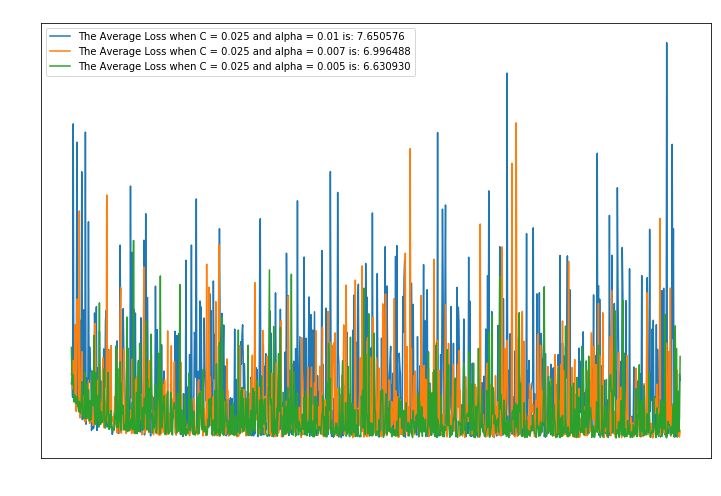

In [525]:
plt.figure(figsize = (12,8))
ax = plt.subplot(111)
for i in [0.01,0.007,0.005]:
    train_theta,train_loss = stochastic_grad_descent(X_train, y_train, alpha=i, 
                                                 lambda_reg=10**-4, num_epoch=1000, C = 0.025)
    Theta = train_theta[-1]
    ax.plot(range(1000),train_loss.T[-1], label = 
             'The Average Loss when C = 0.025 and alpha = %s is: %4f' % (str(i), np.mean(train_loss)))
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Square Loss')
ax.xaxis.label.set_color('w')
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='y', colors='w')
ax.set_title('Fixed steps sizes',color='w')

In [380]:
#Loading the dataset
print('loading the dataset')

df = pd.read_csv('data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term
# TODO

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


In [475]:
theta = np.array([1,2,3,4,5,6,7,8])
a = np.array([2,3,4,5,6,7,8,9])
print(np.dot(theta.T,a))

240


In [1]:
import random

In [16]:
random.random()

83.56730910194521